In [8]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

In [9]:
phase_no=40

arr= np.genfromtxt(f'0.1_list_{phase_no}.csv', delimiter=',')

In [10]:
arr[3][1:]

array([251.3290054 , 251.35162833, 251.35281371, 251.34770624,
       251.31911777, 251.02900511, 251.03896255, 251.04547121,
       251.04330739, 257.30728987, 250.80731386, 250.82594745,
       250.83397646, 257.11061387, 250.81470659, 256.91272841,
       250.64048815, 250.65487734, 250.64504343, 250.62898463,
       256.74845793, 256.75354209, 250.48236057, 250.48228482,
       250.46378901, 250.2988493 , 250.31059151, 256.59645393,
       250.31338703, 250.30010375, 256.39866009, 250.13315355,
       250.13930577, 250.139064  , 250.13223049, 249.93759451,
       256.22907468, 249.95162775, 249.95051277, 256.22989761,
       255.98335699, 255.99513554, 249.72666025, 249.7298572 ,
       256.00246213, 255.63903506, 255.65334722, 255.65961059,
       249.39996455, 255.66975982])

In [11]:
def unpack_phi(phase_no):
    
    arr= np.genfromtxt(f'0.1_list_{phase_no}.csv', delimiter=',')
    
    phi_list= [i if i < np.pi else  i-2*np.pi  for i in arr[3][1:]%(2*np.pi)]
    
    phi_array= np.reshape(phi_list, (10,5))
            
    return phi_array

In [12]:
unpack_phi(10).T

array([[ 1.54016126e-04, -7.55099356e-01, -1.30331180e+00,
        -1.66545155e+00,  2.30049641e+00, -2.29828886e+00,
        -2.19033750e+00, -2.83134070e+00,  1.81167240e+00,
         8.23506729e-01],
       [-2.24922596e-01, -1.94377200e-01, -5.57125570e-01,
        -1.16725160e+00, -7.03922939e-01, -1.11464610e+00,
        -1.11244105e+00, -2.78434876e+00,  2.92820925e+00,
         2.21800772e+00],
       [ 1.56439579e+00, -1.68577804e-01, -6.70696713e-01,
        -6.74511863e-01, -8.11946040e-01, -9.63143651e-01,
        -1.44598063e+00, -2.03810063e+00, -2.47926545e+00,
         2.71596141e+00],
       [ 1.24463792e+00,  5.97596575e-01, -5.60603111e-01,
        -5.83849901e-01, -6.06194595e-01, -7.19303586e-01,
        -1.23495239e+00, -8.56889760e-01, -4.35307253e-01,
        -6.69148520e-01],
       [-6.39669834e-01, -1.33625662e+00,  6.27489697e-01,
        -2.24355759e-01, -2.48360965e-01, -5.08940328e-01,
        -1.26086165e+00, -1.49954652e+00, -2.30923577e+00,
        -3.

In [13]:
import seaborn as sns

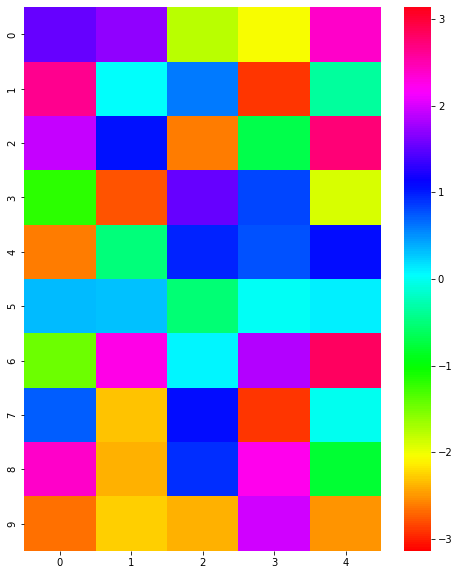

In [14]:
sns.heatmap(unpack_phi(0), vmin= -np.pi, vmax= np.pi, cmap= 'hsv');

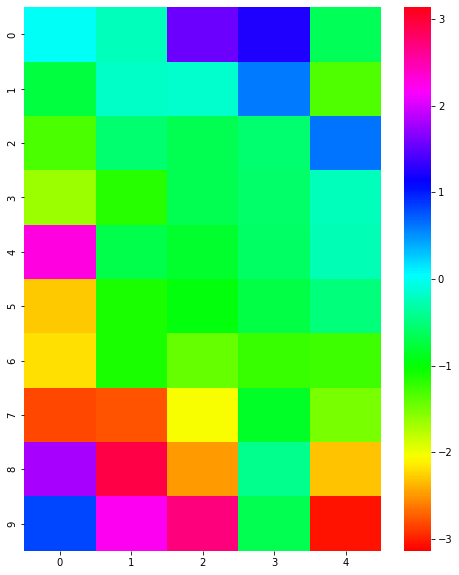

In [15]:
sns.heatmap(unpack_phi(10), vmin= -np.pi, vmax= np.pi, cmap= 'hsv');

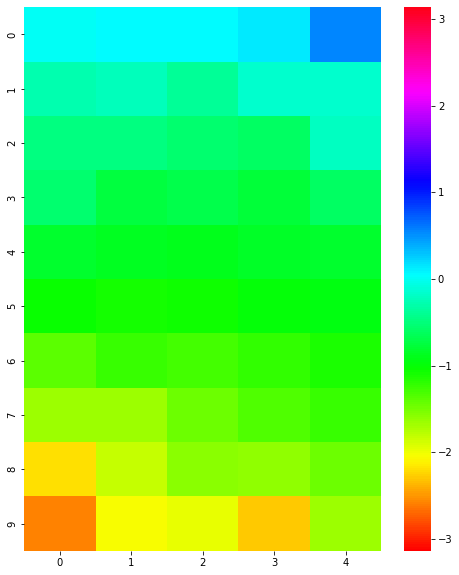

In [16]:
sns.heatmap(unpack_phi(20), vmin= -np.pi, vmax= np.pi, cmap= 'hsv');

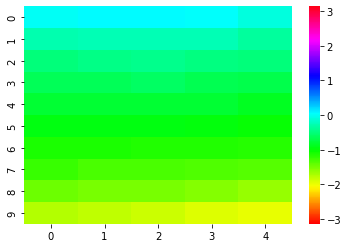

In [10]:
sns.heatmap(unpack_phi(30), vmin= -np.pi, vmax= np.pi, cmap= 'hsv');

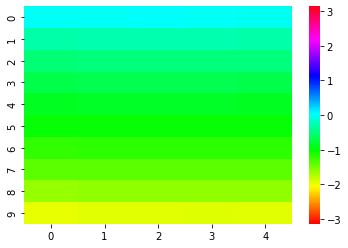

In [11]:
sns.heatmap(unpack_phi(40), vmin= -np.pi, vmax= np.pi, cmap= 'hsv');

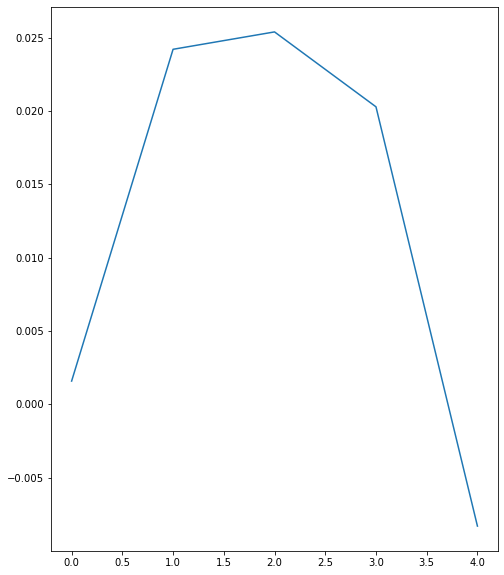

In [17]:
#Takes too long to converge to lateral phase

plt.plot(unpack_phi(40)[0]);

In [50]:
#Behold a little 'cheating' force a symmetric initial condition on both y-axis and run simulation

phi_list= unpack_phi(40)

def lamb(x_n, y_n, phi_list):
    
    arr= (np.array([i[::-1] for i in phi_list]) + phi_list)/2
    
    return arr[x_n][y_n]

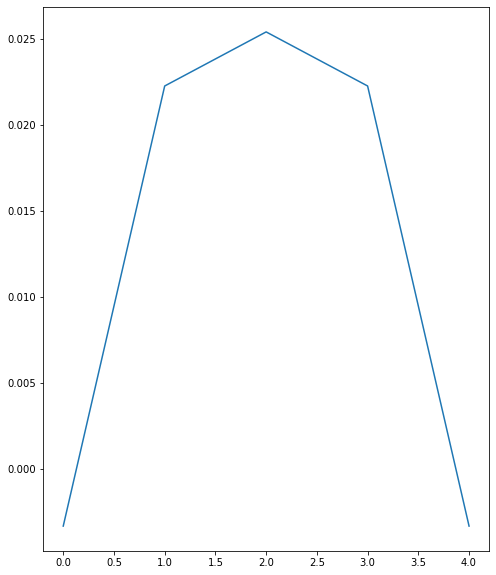

In [19]:
plt.plot(((np.array([i[::-1] for i in phi_list]) + phi_list)/2)[0])

In [51]:
import fluid_functions as ff
import numpy as np

from cilia_test_copy import Cilium
from cilia_test_copy  import Cilia_System
from cilia_test_copy  import big_phi


import matplotlib.pyplot as plt
from itertools import product

import matplotlib.cm as cm

l_ambda = 0.1
r0= 0.5
lattice= 2
a_radii=0.01

f0 = lambda phi : 0

y_n=5
x_n=10

Cilia_System_1= Cilia_System()

new_constants= np.array([r0, l_ambda ,10])

Cilia_row= [Cilium([i*lattice, j*lattice], [0,r0,lamb(i, j, unpack_phi(40))], constants= np.array([r0, l_ambda ,10]), a= a_radii) for i, j in product(range(x_n), range(y_n))]

Cilia_System_1.add(Cilia_row)


In [66]:
while Cilia_System_1.phi_list[0] < (20*np.pi):
    
    Cilia_System_1.update(stepsize= 0.02)

KeyboardInterrupt: 

In [67]:
Cilia_System_1.phi_list

array([47.99372163, 48.04819159, 48.05918414, 48.04798264, 47.99346532,
       47.71475605, 47.75089382, 47.75929549, 47.75049558, 47.71426276,
       47.51984498, 47.54690155, 47.55303867, 47.54733874, 47.51783046,
       47.35508171, 47.37525271, 47.38010046, 47.37487327, 47.35458369,
       47.20151633, 47.21593634, 47.21969796, 47.21358903, 47.19909398,
       47.04505593, 47.05455066, 47.05785636, 47.05436434, 47.04479493,
       46.88017805, 46.88651865, 46.89014214, 46.88626864, 46.87982111,
       46.6926681 , 46.70121895, 46.70574253, 46.70084806, 46.69207343,
       46.46111811, 46.47604261, 46.48362813, 46.47650679, 46.46106312,
       46.13417223, 46.1518993 , 46.16491282, 46.1513836 , 46.13238679])

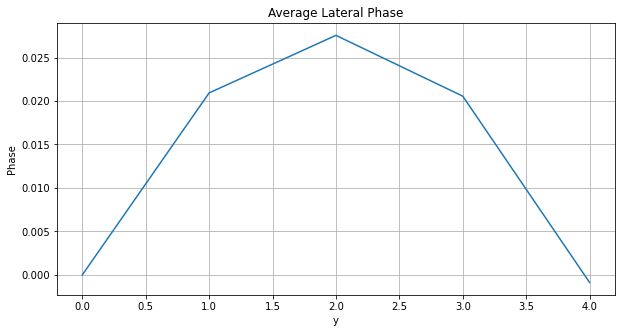

In [68]:
arr= Cilia_System_1.phi_list%(2*np.pi)

arr= np.array([i if i < np.pi else  i-2*np.pi  for i in arr])

arr=np.reshape(arr, (10,5))

plt.rcParams["figure.figsize"] = (10,5)

plt.plot(np.mean(arr, axis=0)-np.mean(arr, axis=0)[0]);
plt.grid()
plt.title('Average Lateral Phase')
plt.xlabel('y')
plt.ylabel('Phase');


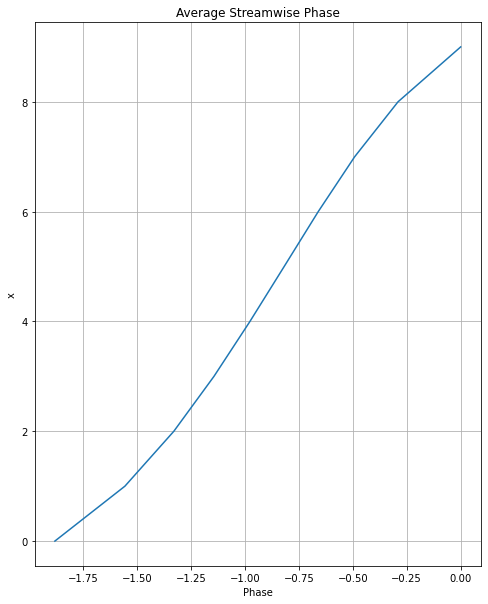

In [74]:
phis= np.mean(arr, axis=1)[::-1]-np.mean(arr, axis=1)[::-1][-1]

phis= np.array([i if i < np.pi else  i-2*np.pi  for i in phis])

plt.plot(phis, np.linspace(0, 9, 10))

plt.rcParams["figure.figsize"] = (8,10)
plt.grid()
plt.title('Average Streamwise Phase')
plt.xlabel('Phase')
plt.ylabel('x');